<a href="https://colab.research.google.com/github/aishwary247/Deep-Learning/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

In [38]:
import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


#Getting Dataset

In [39]:
from  torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", # where to download data to
    train = True, # do we want the training set
    download = True,
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform= None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform=None
)

In [40]:
len(train_data), len(test_data)

(60000, 10000)

In [41]:
image, label = train_data[0]
image, label


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [42]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [43]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [44]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [45]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

# Visualise the data

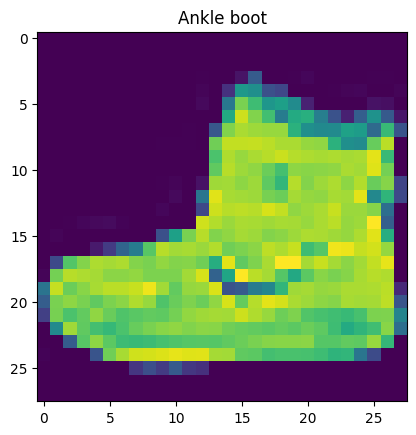

In [46]:
import matplotlib.pyplot as plt
plt.title(class_names[label])
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

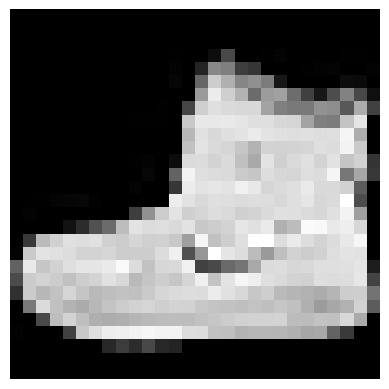

In [47]:
plt.imshow(image.squeeze(), cmap= "gray")
plt.axis(False)

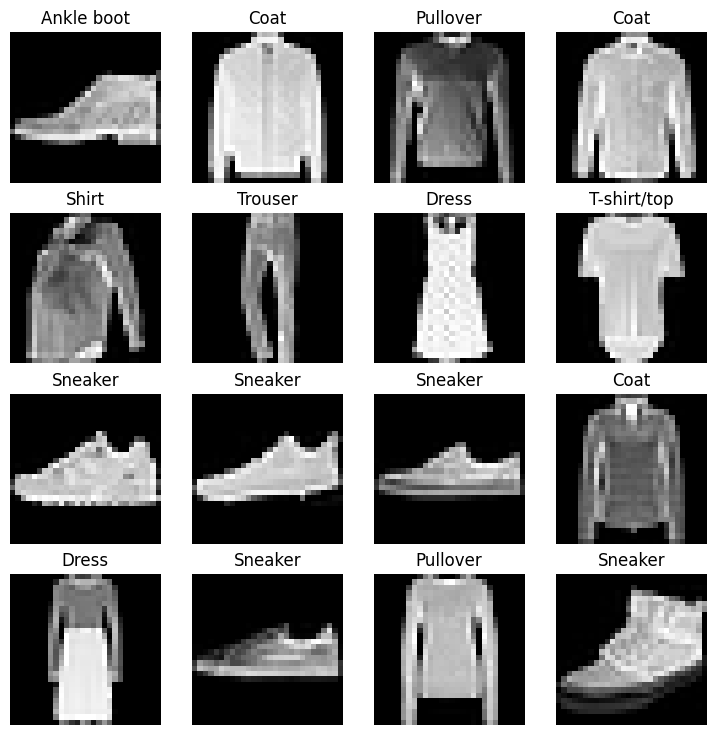

In [48]:
# Seeing random data from the dataset
fig = plt.figure(figsize = (9,9))
rows, cols = 4,4
for i in range(1,rows*cols +1 ):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols,i)
  plt.imshow(img.squeeze(),cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)

# Prepare Data Loader
Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradients per epoch.

In [49]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# Turn datasets to iterables
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = 32,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c46353e9720>,
 <torch.utils.data.dataloader.DataLoader at 0x7c4635712290>)

In [50]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [51]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

# Model 0: Build a basline model
When starting to build a series of maachine learning modelling experiments, its best practice to start with a baseline model.

A baseline model is a simple model you will try and improvw upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary

In [52]:
# Create a flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [53]:
from torch import nn
class FashionMNISTmodelVo(nn.Module):
  def __init__(self,
               input_features: int,
               hidden_units: int,
               output_features: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [54]:
model_0 = FashionMNISTmodelVo(input_features = 784, # 28 * 28
                              output_features = len(class_names),
                              hidden_units = 10).to("cpu")
model_0

FashionMNISTmodelVo(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [55]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

###  3.1 Setup a loss function and an optimiser


In [56]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [57]:
from timeit import default_timer as timer

In [58]:
start_time = timer()
# ..code
end_time = timer()
print(f"time taken: {end_time-start_time}")


time taken: 3.881800000726798e-05


In [59]:
# Highlight that the optimizer will update a model's parameters once per batch rather than once per epoch

In [60]:
def accuracy_fn(y_pred,y_true):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

### Creating a training loop and training a model on batches of data



In [61]:
from tqdm.auto import tqdm

In [62]:
str(next(model_0.parameters()).device)

'cpu'

In [63]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate the loss

    loss = loss_fn(y_pred,y)
    train_loss += loss

    # 3. Optimize zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0 :
      print(f"Lokked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  ## Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:

      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(test_pred.argmax(dim = 1), y_test)

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrainloss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}")

end_time = timer()
model_0_time = end_time-start_time
print(f"time taken: {end_time-start_time}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Lokked at 0/ 60000 samples
Lokked at 12800/ 60000 samples
Lokked at 25600/ 60000 samples
Lokked at 38400/ 60000 samples
Lokked at 51200/ 60000 samples

Trainloss: 0.5896 | Test loss: 0.5054, Test acc: 82.33
Epoch: 1
-------
Lokked at 0/ 60000 samples
Lokked at 12800/ 60000 samples
Lokked at 25600/ 60000 samples
Lokked at 38400/ 60000 samples
Lokked at 51200/ 60000 samples

Trainloss: 0.4757 | Test loss: 0.4842, Test acc: 82.89
Epoch: 2
-------
Lokked at 0/ 60000 samples
Lokked at 12800/ 60000 samples
Lokked at 25600/ 60000 samples
Lokked at 38400/ 60000 samples
Lokked at 51200/ 60000 samples

Trainloss: 0.4545 | Test loss: 0.4782, Test acc: 83.34
time taken: 26.990753192


# 4. Making predictions and getting model_0 results

In [64]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = "cpu"):
  """ Returns a dictionary containing the results of model predicting on data_loader. """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_pred.argmax(dim = 1), y)

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [65]:
model_0_results = eval_model(model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                              accuracy_fn =accuracy_fn)
model_0_results


{'model_name': 'FashionMNISTmodelVo',
 'model_loss': 0.4782179594039917,
 'model_acc': 83.33666134185303}

# Model 1: Build a better model with non-linearity

In [66]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [67]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [68]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

In [69]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

# Functionising the training and testing loop

In [70]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device = device):
  train_loss, train_acc = 0, 0

  model.train()

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(data_loader):

    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss

    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_pred.argmax(dim = 1), y)

    # 3. Optimize zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()



  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train Loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}\n")


In [71]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn,
               device : torch.device = device):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in data_loader:
      X_test, y_test = X_test.to(device), y_test.to(device)

      test_pred = model(X_test)
      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(test_pred.argmax(dim = 1), y_test)

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f" Test loss: {test_loss:.4f}| Test acc: {test_acc:.2f} \n")

In [72]:
torch.manual_seed(42)
epochs = 3

start_time = timer()
# for epoch in tqdm(range(epochs)):
#   print(f"Epoch: {epoch} \n ------")
#   train_step(model_1,train_dataloader,loss_fn, optimizer,
#              accuracy_fn,device)

#   test_step(model_1,test_dataloader,loss_fn,
#             accuracy_fn, device )
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


end_time = timer()
model_1_time = end_time - start_time
print(f"time taken: {end_time - start_time}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train Loss: 1.09199 | Train accuracy: 61.34

 Test loss: 0.9564| Test acc: 65.00 

Epoch: 1
----------
Train Loss: 0.78101 | Train accuracy: 71.93

 Test loss: 0.7223| Test acc: 73.91 

Epoch: 2
----------
Train Loss: 0.67027 | Train accuracy: 75.94

 Test loss: 0.6850| Test acc: 75.02 

time taken: 30.023441552999998


In [73]:
device

'cuda'

In [74]:
model_1_results = eval_model(model_1,
                             test_dataloader,
                             loss_fn,
                             accuracy_fn,
                             device = "cuda")
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network(CNN)

In [75]:
def accuracy_fn(y_pred,y_true):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [76]:
# Create a convolutional neural network (tiny VVG architecture)
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website
  """
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__ ()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                  out_features = output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x



In [77]:
image.shape

torch.Size([1, 28, 28])

In [78]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape =1 , # denotes number of color channels
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

In [79]:
# Setting up loss function and optimizer for model_2
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

In [80]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

In [82]:
# Training and testing loop
epochs = 3

start_time = timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n ------")
  train_step(model = model_2,
            data_loader = train_dataloader,
            loss_fn = loss_fn,
            optimizer= optimizer,
            accuracy_fn = accuracy_fn,
            device = device)
  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

end_time = timer()
model_2_time = end_time -start_time
print(f"\nTrain time for model_2: {end_time-start_time}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 ------
Train Loss: 0.42109 | Train accuracy: 84.76

 Test loss: 0.3803| Test acc: 85.90 

Epoch: 1
 ------
Train Loss: 0.33707 | Train accuracy: 87.99

 Test loss: 0.3258| Test acc: 88.51 

Epoch: 2
 ------
Train Loss: 0.30674 | Train accuracy: 88.93

 Test loss: 0.3165| Test acc: 88.65 


Train time for model_2: 37.18970727200002


In [83]:
!nvidia-smi

Thu Dec 21 17:21:41 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0              28W /  70W |    203MiB / 15360MiB |     10%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [84]:
# Getting model_2 results
model_2_results = eval_model(model_2,
                             test_dataloader,
                             loss_fn,
                             accuracy_fn,
                             device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.316477507352829,
 'model_acc': 88.64816293929712}

In [85]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTmodelVo,0.478218,83.336661
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.316478,88.648163


In [86]:
compare_results["Training_time"] = [model_0_time,
                                    model_1_time,
                                    model_2_time]

compare_results

,model_name,model_loss,model_acc,Training_time
0,FashionMNISTmodelVo,0.478218,83.336661,26.990753
1,FashionMNISTModelV1,0.685001,75.019968,30.023442
2,FashionMNISTModelV2,0.316478,88.648163,37.189707


# Make and evaluate predictions using our best model

In [87]:
def make_predictions(model : torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_labels = []
  model.eval()
  with torch.inference_mode():
    for sample in data :
      # add a batch dimension and pass to device
      sample = sample.unsqueeze(dim = 0 ).to(device)

      y_logit = model(sample)

      y_pred = y_logit.squeeze().softmax(dim = 0)

      pred_labels.append(y_pred.argmax(dim = 0).item())

    return pred_labels




In [88]:
A = [torch.tensor([1,2,3]),torch.tensor([4,5,6]),torch.tensor([7,8,9])]
B = torch.stack(A) # Stacking list as tensor
B

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [89]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

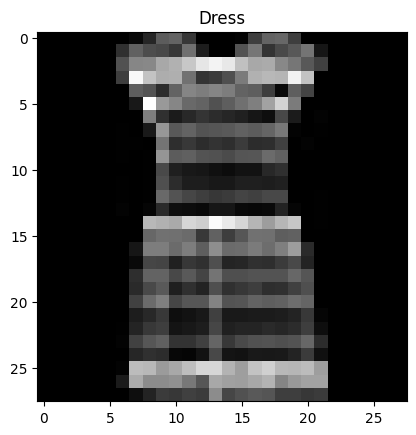

In [90]:
plt.imshow(test_samples[0].squeeze(dim=0), cmap="gray")
plt.title(class_names[test_labels[0]])

In [91]:
test_samples[0].shape

torch.Size([1, 28, 28])

In [92]:
# Make predictions
pred_probs = make_predictions(model = model_2,
                              data = test_samples)
pred_probs

[3, 7, 1, 1, 4, 4, 7, 2, 2]

In [93]:
test_labels

[3, 9, 1, 1, 4, 4, 7, 6, 2]

# Making Confusion matrix for further model evaluation
1. Making predictions on all of the test data using our model
2. Finding out the confusion matrix using 'torchmetrics.ConfusionMatrix'
3. Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix()

In [94]:
len(test_data.targets.tolist())


10000

In [95]:
test_samples = []
for sample, label in test_data:
  test_samples.append(sample)


In [96]:
test_samples[0].shape, len(test_samples)

(torch.Size([1, 28, 28]), 10000)

In [97]:
y_pred = make_predictions(model=model_2,
                          data = test_samples)
y_pred = torch.tensor(y_pred)
y_pred

tensor([9, 2, 1,  ..., 8, 1, 8])

In [98]:
y_pred.shape

torch.Size([10000])

In [99]:
test_data.targets.shape

torch.Size([10000])

In [100]:
! pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 5.4 MB/s eta 0:00:00


In [101]:
import mlxtend
mlxtend.__version__

'0.22.0'

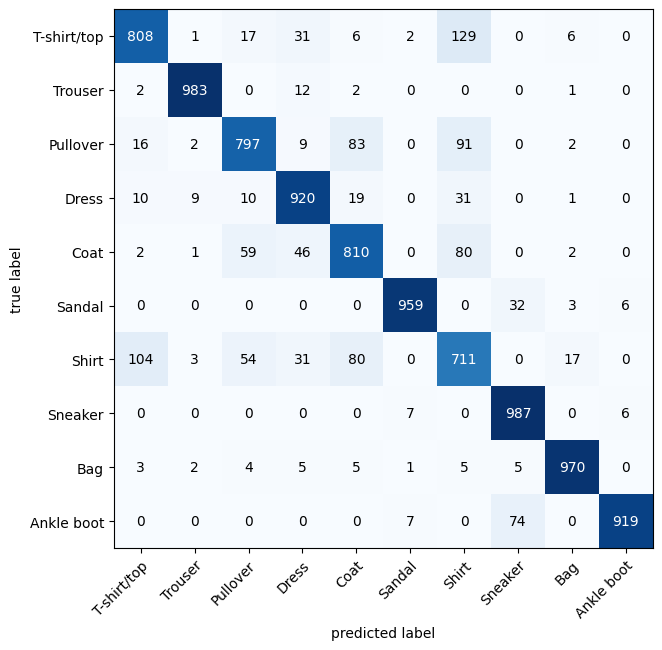

In [102]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task = "multiclass",num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred,
                         target = test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

# Saving and loading our best model (model_2)

In [103]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

MODEL_NAME = "CNN_MODEL_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/CNN_MODEL_2.pth


### Loading the model

In [104]:
loaded_model = FashionMNISTModelV2(input_shape = 1,
                                   hidden_units = 10,
                                   output_shape = 10)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [106]:
loaded_model.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [107]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.316477507352829,
 'model_acc': 88.64816293929712}

In [108]:
# Evaluating the model
loaded_model_results = eval_model(model = loaded_model,
                                  data_loader = test_dataloader,
                                  loss_fn = loss_fn,
                                  accuracy_fn = accuracy_fn,
                                  device = device)
loaded_model_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.316477507352829,
 'model_acc': 88.64816293929712}